<a href="https://colab.research.google.com/github/momohhellen/X-Health-AI/blob/main/HELLENMOMOH_COVID19PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! jupyter nbconvert --to html HELLENMOMOH_COVID19PROJECT.ipynb

[NbConvertApp] Converting notebook HELLENMOMOH_COVID19PROJECT.ipynb to html
[NbConvertApp] Writing 1612174 bytes to HELLENMOMOH_COVID19PROJECT.html


Hellen S Momoh - Covid19 Project

Description Background and Context

Covid-19 is a fast-growing disease that affects human health severely. Patients diagnosed with this condition suffer from lung infections. The medical community has recently released vaccines that have a slower effect in increasing immunity. This virus has impacted various countries' human health and financial standards. Deep learning algorithms have recently used image classification to identify medical images. Convolutional Neural Networks (CNN) can be widely utilized to identify COVID-19 to assist radiologists in medical analysis by classifying patients who are healthy, have viral pneumonia, or are affected by COVID using X-ray pictures of the lungs. Objective

The aim of this project is to build a Convolutional Neural Network to differentiate an X-ray image of a normal person from an unhealthy one.

Data Description

This dataset contains training set images of 3 classes which are converted into numpy arrays. The dataset comprises 3 classes: COVID-19: The patient who is affected due to covid. Viral Pneumonia: This is a viral fever that has similar characteristics to Covid but is not covid. Normal- A healthy Person. The data file names are: CovidImages.npy CovidLabels.csv Due to the large volume of data, the images were converted to the CovidImages.npy file and the labels are also put into CovidLabels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

In [ ]:
#Necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import seaborn as sns



import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.optimizers import Adam, SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from google.colab.patches import cv2_imshow


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CovidImages.npy to CovidImages.npy


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CovidLabels.csv to CovidLabels.csv


In [ ]:
# Loading the image file of dataset
images = np.load('CovidImages.npy')

# Loading the labels file of dataset
labels = pd.read_csv('CovidLabels.csv')

In [ ]:
print(images.shape)

print(labels.shape)


(251, 128, 128, 3)
(251, 1)


The data is stored in a 4-dimensional Numpy array.

The first dimension is 251 which indicates the number of images in the training data. The second dimension 128 shows the number of pixels along the X-axis, the third dimension 128 shows the number of pixels along the Y-axis, and the fourth dimension 3 is the total number of channels in those images.

In [ ]:
def plot_images(images,labels):
  num_classes=10
  categories=np.unique(labels)
  keys=dict(labels['Label'])
  rows = 3
  cols = 4
  fig = plt.figure(figsize=(10, 8))
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)
          ax.imshow(images[random_index, :])
          ax.set_title(keys[random_index])
  plt.show()

**Exploratory Data Analysis**
Converting Numpy arrays to images and visualizing them.

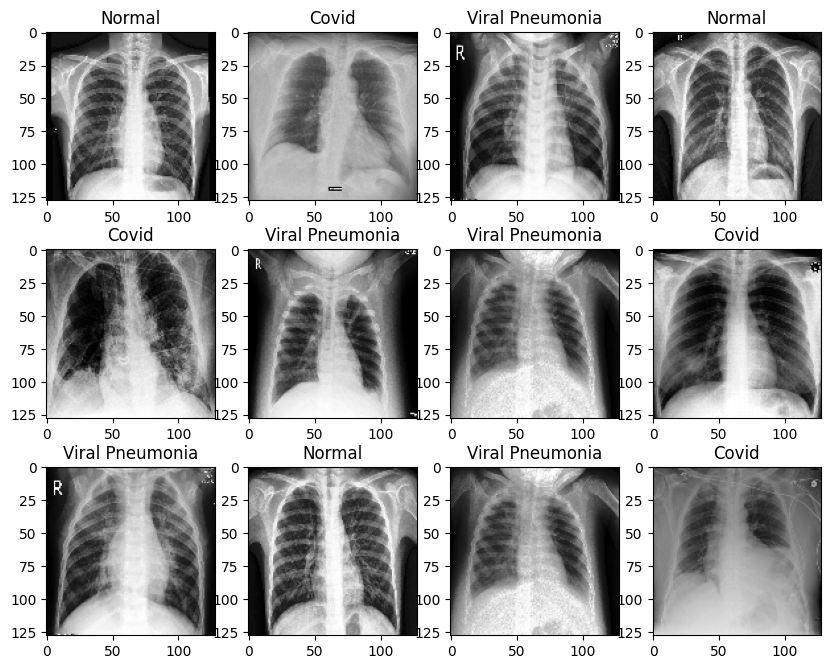

In [ ]:
plot_images(images, labels)

(array([0, 1, 2]),
 [Text(0, 0, 'Viral Pneumonia'), Text(1, 0, 'Covid'), Text(2, 0, 'Normal')])

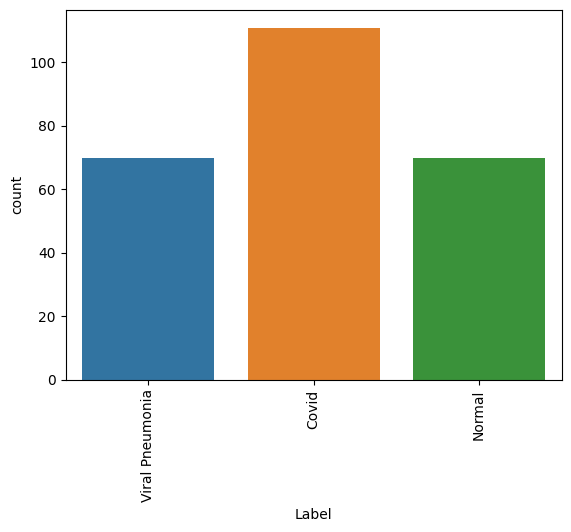

In [ ]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

Observation on EDA

The model shows high imbalance.
 We will use the appropriate evaluation methods for imbalanced classification like Precision and Recall to evaluate the model since it shows a high imbalanced.

Now, we will pre-process the data and converting the BGR images to RGB images.  

In [ ]:
images_decreased = []

height = 64
width = 64

dimensions = (width, height)

for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation = cv2.INTER_LINEAR))

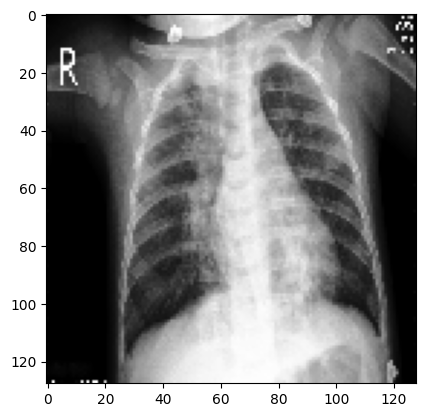

In [ ]:
plt.imshow(images[3])

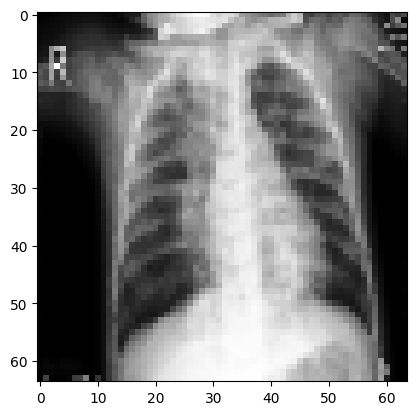

In [ ]:
plt.imshow(images_decreased[3])

Now we prepare the data for modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(images_decreased), labels, test_size = 0.1, random_state = 42, stratify = labels)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(225, 64, 64, 3) (225, 1)
(26, 64, 64, 3) (26, 1)


Now we encode the target labels by converting the labels from names to one hot vectors.Since we have already used encoding methods like onehotencoder and labelencoder, now we will be using a new encoding method called labelBinarizer.
Labelbinarizer works similar to onehotencoder

In [ ]:
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()

y_train_encoded = enc.fit_transform(y_train)

y_test_encoded = enc.transform(y_test)

In [ ]:
y_train_encoded.shape,y_test_encoded.shape

((225, 3), (26, 3))

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0

X_test_normalized = X_test.astype('float32')/255.0

Now we build the model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(8, activation = 'relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(3, activation = 'softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate = 0.01, momentum = 0.9)
opt=Adam()

# Compile model
model1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 8)                 1

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs = 10,
            validation_split = 0.1,
            shuffle = False,
            batch_size = 64,
            verbose = 1
)

Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: 1.1048 - accuracy: 0.3317 - val_loss: 1.0980 - val_accuracy: 0.4348
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 1.1050 - accuracy: 0.3861 - val_loss: 1.0975 - val_accuracy: 0.4348
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 1.0980 - accuracy: 0.4406 - val_loss: 1.0971 - val_accuracy: 0.4348
Epoch 4/10
4/4 [==============================] - 11s 2s/step - loss: 1.0977 - accuracy: 0.4406 - val_loss: 1.0966 - val_accuracy: 0.4348
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 1.0974 - accuracy: 0.4406 - val_loss: 1.0961 - val_accuracy: 0.4348
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 1.0972 - accuracy: 0.4406 - val_loss: 1.0956 - val_accuracy: 0.4348
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 1.0969 - accuracy: 0.4406 - val_loss: 1.0951 - val_accuracy: 0.4348
Epoch 8/10
4/4 [========================

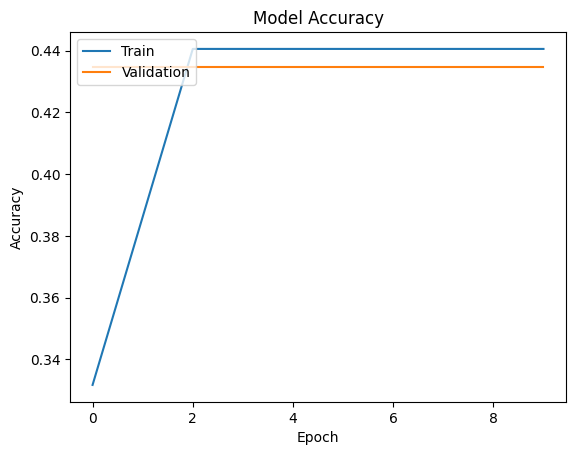

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

#Observations:

The training accuracy of the model1 is not good and the validation accuracy is also not good.This shows that the model is not stable and not performing well.
Now we try the model performance on the test set.

In [ ]:
#Evaluating the model on test data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose = 2)

1/1 - 0s - loss: 1.0950 - accuracy: 0.4615 - 172ms/epoch - 172ms/step


In [ ]:
#Plotting the Confusion Matrix

# Getting the output as probablities for each category
y_pred = model1.predict(X_test_normalized)

1/1 [==============================] - 0s 309ms/step


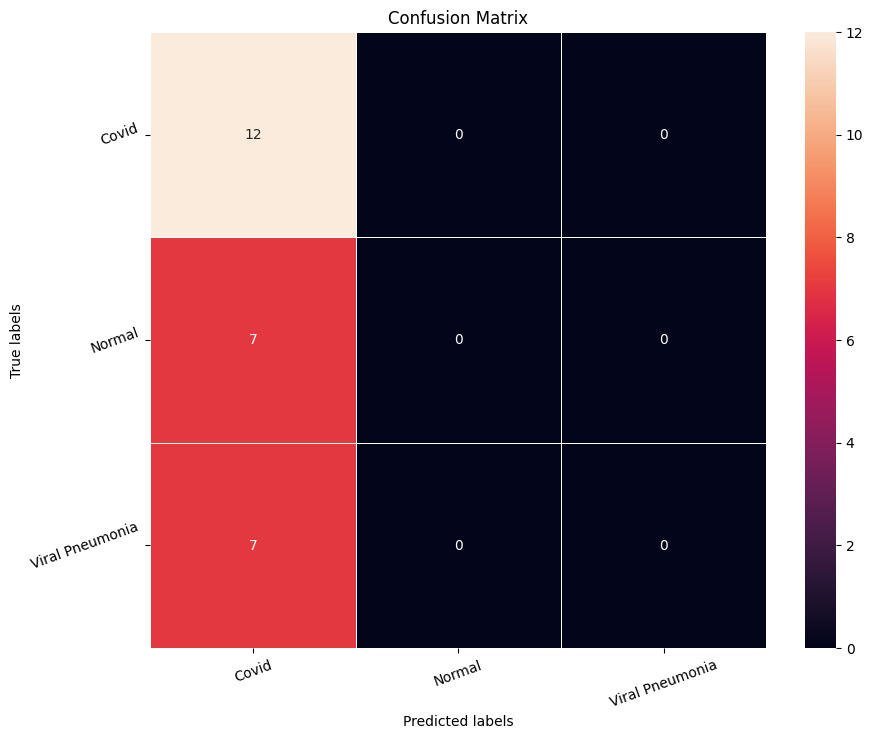

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded, axis = 1)

confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Viral Pneumonia'], rotation = 20)
ax.yaxis.set_ticklabels(['Covid', 'Normal', 'Viral Pneumonia'], rotation = 20)
plt.show()

Observations

In comparison to the rest, we can see that classes Normal and Viral Pneumonia are often misclassified. There are a few cases that are normal but are predicted to have COVID and a few cases that are Viral Pneumonia but are predicted to be normal.The COVID category seems to be predicted well but We will build a model that will classify the Normal and Viral Pneumonia classes correctly. In general, the model is in good shape since it does not confuse Viral Pneumonia and COVID. Most of the images with the COVID class are predicted correctly, and this is the most desired output since a patient having COVID should never be misclassified with other classes as being healthy or only having a viral fever.

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Creating the data generator
datagen_train = ImageDataGenerator(
                              rotation_range = 20,
                              fill_mode = 'nearest',
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

model2.add(Conv2D(16, (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(8, (3, 3), activation = 'relu', padding = "same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(BatchNormalization())
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(16, activation = 'relu'))
model2.add(Dropout(0.3))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(3, activation = 'softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate = 0.01, momentum = 0.9)
opt=Adam(learning_rate = 0.001)

# Compile model
model2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 8)        32        
 ormalization)                                                   
                                                        

In [ ]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# Epochs
epochs = 10

# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                       batch_size = batch_size,
                                       shuffle = False),
                                       epochs = epochs,
                                       steps_per_epoch = X_train_normalized.shape[0] // batch_size,
                                       validation_data = (X_test_normalized, y_test_encoded),
                                       verbose = 1, callbacks = [learning_rate_reduction])

Epoch 1/10
3/3 [==============================] - 3s 335ms/step - loss: 1.0923 - accuracy: 0.4534 - val_loss: 1.0903 - val_accuracy: 0.2692 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - 1s 300ms/step - loss: 0.7882 - accuracy: 0.6770 - val_loss: 1.1009 - val_accuracy: 0.3462 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - 1s 304ms/step - loss: 0.6083 - accuracy: 0.7453 - val_loss: 1.1262 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 4/10
3/3 [==============================] - 1s 244ms/step - loss: 0.5793 - accuracy: 0.7578 - val_loss: 1.1359 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 5/10
3/3 [==============================] - 1s 271ms/step - loss: 0.4893 - accuracy: 0.8075 - val_loss: 1.1439 - val_accuracy: 0.2692 - lr: 0.0010
Epoch 6/10
3/3 [==============================] - ETA: 0s - loss: 0.3902 - accuracy: 0.8199
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
3/3 [==============================] - 1s 236ms/step - loss: 0.3902

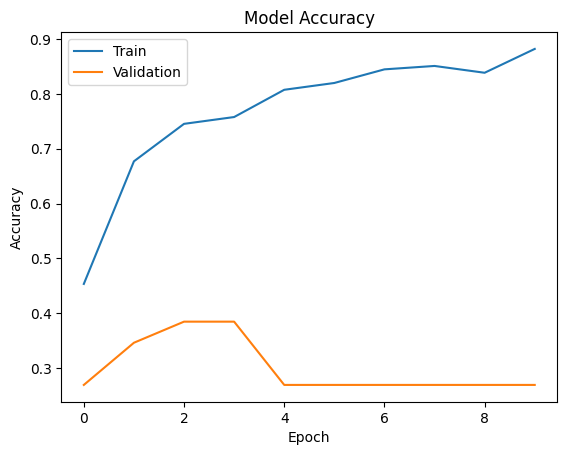

In [ ]:
#Model Evaluation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose = 2)

1/1 - 0s - loss: 1.1126 - accuracy: 0.2692 - 75ms/epoch - 75ms/step


In [ ]:

y_pred = model2.predict(X_test_normalized)

1/1 [==============================] - 0s 192ms/step


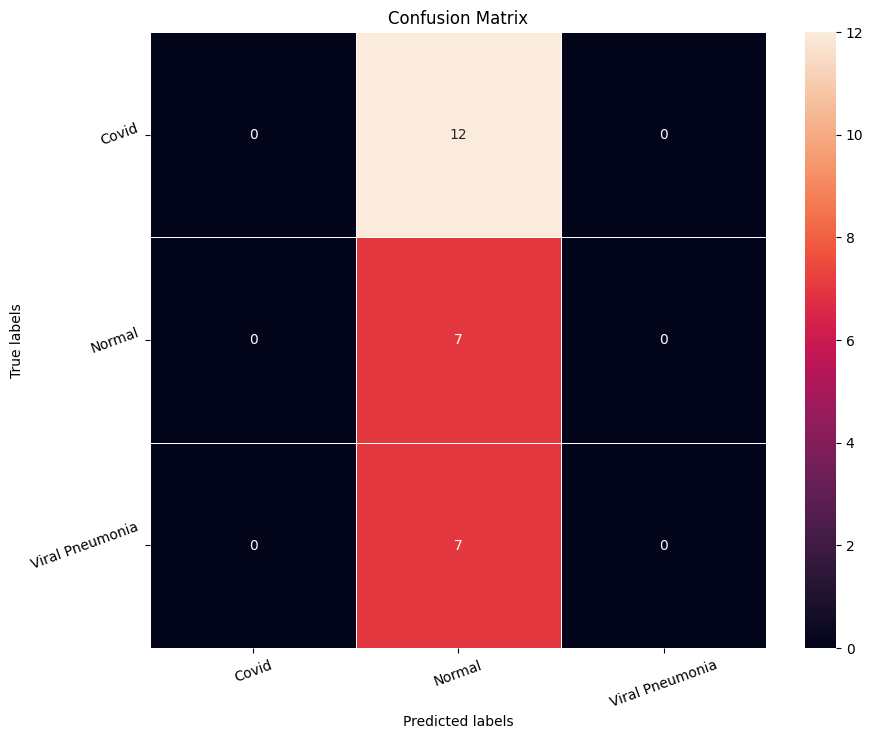

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded,axis = 1)

confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Viral Pneumonia'], rotation = 20)
ax.yaxis.set_ticklabels(['Covid', 'Normal', 'Viral Pneumonia'], rotation = 20)
plt.show()

Observations:

Here, we can observe that the model has predicted most cases having covid to be normal. This can be fatal, if a patient having severe case of Covid is to be classified as being normal.
Hence we cannot accept this model and we have to look at alternative architectures.

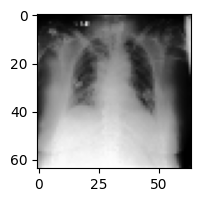

1/1 [==============================] - 0s 26ms/step
Predicted Label ['Normal']
True Label Covid


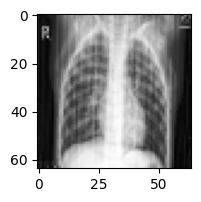

1/1 [==============================] - 0s 31ms/step
Predicted Label ['Normal']
True Label Viral Pneumonia


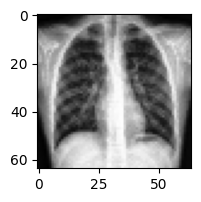

1/1 [==============================] - 0s 29ms/step
Predicted Label ['Normal']
True Label Normal


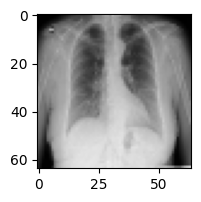

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Normal']
True Label Covid


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize = (2, 2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize = (2, 2))
plt.imshow(X_test[10])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[10].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[10])

plt.figure(figsize = (2, 2))
plt.imshow(X_test[20], )
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[20].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[20])

plt.figure(figsize = (2, 2))
plt.imshow(X_test[5])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[5].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[5])

Observations

Data augmentation has helped in creating a generalized model since all the above images are classified correctly.


Actionable Insights and Business Recommendations

Convolutional Neural Networks (CNNs), as we have seen are able to excel at making predictions on images.
CNNs have proven to be superior in this area amongst other Machine learing and Deep learning frameworks. In real practice, we have seen some of the reasons CNNs are advantageous over ANNs in making predictions on image data for businesses. These reasons are atrributed to the Spatial and Translational Invariance, the ability to extract important features and discard unimportant ones, and their relative computational efficiency over ANNs and traditional ML.
Clearly in this project, we have seen how medical research has been a domain that has benefited greatly from the ability of CNNs in image prediction tasks. The best CNNs, with architectural modifications necessary for the unique use cases of the medical domain, have been shown to rival and sometimes even surpass the performance of experienced radiologists at tasks like tumor detection, and can hence serve as a useful source of second opinion for medical professionals in diagnosis and decision-making.
The ability for businesses to automate this task using CNNs would represent benefits such as the ability to provide faster observations than a human, and the ability to handle a larger volume of the same task.